# Lead Scoring - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of Case Study

* Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


* There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.


In [1]:
# Import all the libraries for Data Analysis, Visualisation & Logisic Regression

# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn.preprocessing import StandardScaler

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


# Check for VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
#Set option to display max 100 columns & 500 rows
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_rows", 500)

# LEADS.CSV

## I) RAW DATA CHECKS

In [3]:
# Reading the data from the CSV file into a DataFrame

leads_df=pd.read_csv("Leads.csv")

In [4]:
# head of our dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#shape of leads_df
leads_df.shape

(9240, 37)

In [6]:
#Let's check out info of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#describe leads_df
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Note: Since we deal with a large set of customers we need to check if there is any duplicates in Prospect ID and Lead Number. If duplicates exists need to take actions accordingly

* Prospect ID:	A unique ID with which the customer is identified.

* Lead Number:	A lead number assigned to each lead procured.


In [8]:
#Duplicate check in Prospect ID
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

In [9]:
#Duplicate check in Lead Number
sum(leads_df.duplicated(subset = 'Lead Number')) == 0

True

* From the above we can conclude that there is no duplicate values exist in Prospect ID & Lead Number, therefore we can proceed further with our EDA.

## II) EXPLORATORY DATA ANALYSIS:

### 1. Data Cleaning and Data Handling

####  i) Missing Values

##### COLUMN WISE

In [10]:
#checking missing values
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#checking percentage of missing values
(leads_df.isnull().sum()/len(leads_df)*100)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [12]:
#checking percentage of missing values and sort them by descending order
null_percentage=(leads_df.isnull().sum()/len(leads_df)*100).sort_values(ascending=False)
null_percentage

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

###### ROW WISE

In [13]:
# Check the row wise null percentages. Find rows with more than 30% of Column data having NULLs

leads_null_rows=(((leads_df.isna().sum(axis=1))/leads_df.shape[1])*100).sort_values(ascending=False)
print(leads_null_rows[leads_null_rows > 30])

3143    35.135135
3597    35.135135
3585    35.135135
5432    35.135135
2733    35.135135
          ...    
3100    32.432432
5733    32.432432
2934    32.432432
3201    32.432432
6120    32.432432
Length: 645, dtype: float64


#### ii) Handling Missing Values: 

##### DROPPING COLUMNS:
* Based on high null percetage(>30)
* Based on its importance in our analysis( dropping columns which are irrelevant/ no use for our models)


In [14]:
#filtering the columns which has null values more than 30%
drop_col = null_percentage[null_percentage>30].keys()
drop_col

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Index', 'Tags'],
      dtype='object')

In [15]:
#dropping those columns
result_df = leads_df.drop(drop_col, axis=1)

In [16]:
#checking shape of result_df
result_df.shape

(9240, 31)

In [17]:
#checking null percentage for result_df
(result_df.isnull().sum()/len(result_df)*100).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [18]:
# removing the column Lead Number is a unique value already
result_df = result_df.drop('Lead Number', axis=1)
# removing the column Prospect ID is a unique value already
result_df = result_df.drop('Prospect ID', axis=1)

In [19]:
#removing the below columns as they are irrelevant/ wont affect for our analysis
# Magazine,Receive More Updates About Our Courses, Update me on Supply Chain Content
# Get updates on DM Content,I agree to pay the amount through cheque,How did you hear about X Education,


result_df=result_df.drop(["Magazine"],axis=1)
result_df=result_df.drop(["Receive More Updates About Our Courses"],axis=1)
result_df=result_df.drop(["Update me on Supply Chain Content"],axis=1)
result_df=result_df.drop(["Get updates on DM Content"],axis=1)
result_df=result_df.drop(["I agree to pay the amount through cheque"],axis=1)
result_df=result_df.drop(["How did you hear about X Education"],axis=1)


In [20]:
#Lead Profile: A lead level assigned to each customer based on their profile.
# Removing Lead Profile as it has no impact on our analysis
result_df=result_df.drop(["Lead Profile"],axis=1)

In [21]:
result_df.shape

(9240, 22)

### iii) CATEGORICAL ANALYSIS

###### Creating our own function to plot Histogram

In [22]:

def plot_histo(df,mylist):
    plt.figure(figsize=(16,16))
    for i in range(len(mylist)):
        plt.subplot(5,3,i+1)
        var=mylist[i]
        sns.countplot(x=var,hue = 'Converted', data=df)
        plt.title(var+' - Distribution')
        plt.ylabel('No. of entries')
        plt.xticks(rotation=90)
        plt.xlabel(None)
        plt.subplots_adjust(hspace = 2.5)

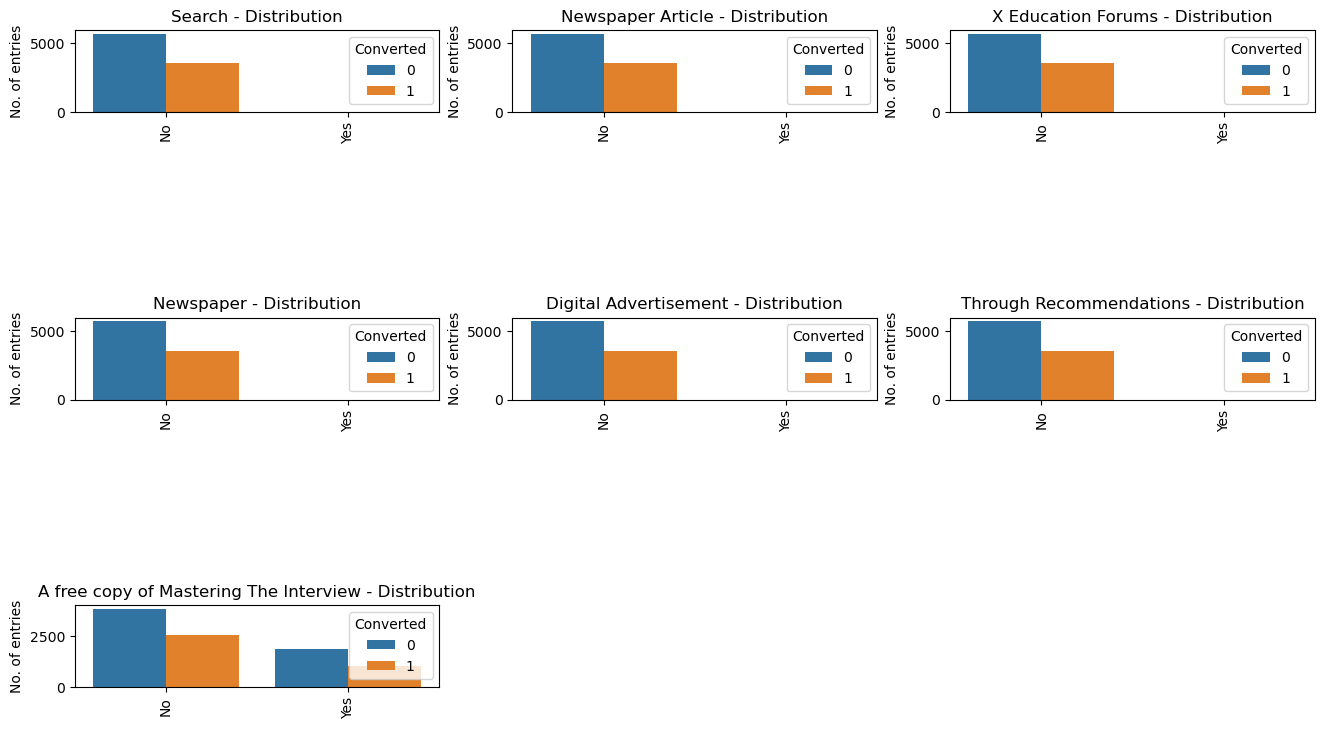

In [23]:
#Imbalance check for categorical cols ['Search','Newspaper Article','X Education Forums','Newspaper',
#'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

Imbalance_check_for_cols=['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Visualising the histogram of the distribution of the above cols

plot_histo(result_df,Imbalance_check_for_cols)


Observation:
* For all these columns except 'A free copy of Mastering The Interview' data is highly imbalanced, thus we will drop them
* "A free copy of Mastering The Interview" it is also not relevant/useful for our model so we can drop the above cols 

In [24]:
#dropping Imbalance_check_for_cols 
result_df = result_df.drop(Imbalance_check_for_cols,axis=1)

In [25]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

###### * LEAD ORIGIN

In [26]:
#checking value counts of Lead Source column

result_df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

###### * DO NOT EMAIL & DO NOT CALL

In [27]:
#checking value counts of 'Do not email' column

result_df['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [28]:
#checking value counts of 'DO not call' column

result_df['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

###### * LEAD SOURCE

In [29]:
#checking value counts of Lead Source column

result_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Observations:

* Google is having highest number of occurences, replace missing values with label 'Google'

* Also we will simplify the column by clubbing the low freq values tagged as 'Others'

In [30]:
#replacing Nan Value with Google
result_df['Lead Source'] = result_df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
result_df['Lead Source'] = result_df['Lead Source'].replace('google','Google')

#combining low frequency values to Others

result_df['Lead Source'] = result_df['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home','WeLearn','blog','Pay per Click Ads','testone','NC_EDM','Live Chat'] ,'Others')

Observation:

* Maximum Leads are generated by Google and Direct Traffic.
* Conversion rate of Reference leads and Welinkgak Website leads is very high.'''

###### * COUNTRY

In [31]:
#checking value counts of Country column

result_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

Observation:

* As we can see that most of the data consists of value 'India', we can drop this column instead of imputing the values.

###### * WHAT MATTERS MOST TO YOU IN CHOOSING A COURSE

In [32]:
#checking value counts of 'What matters most to you in choosing a course' column
result_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Observation:

* As we can see that most of the data consists of value 'Better Career Prospects', we can drop this column instead of imputing the values.

###### * WHAT IS YOUR CURRENT OCCUPATION

In [33]:
#checking value counts of 'What is your current occupation' column
result_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
#Creating new category 'Unknown' for missing vals

result_df['What is your current occupation'] = result_df['What is your current occupation'].replace(np.nan, 'Unknown')

In [35]:
result_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Observation:

* Maximum leads generated are unemployed and their conversion rate is more than 50%.
* Conversion rate of working professionals is very high.

###### * LAST NOTABLE ACTIVITY

In [36]:
#checking value counts of last Notable Activity
result_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [37]:
#clubbing lower frequency values into Other

result_df['Last Notable Activity'] = result_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                                 'Email Marked Spam','Unreachable','Unsubscribed','Email Bounced','Resubscribed to emails','View in browser link Clicked',                                                                     
                                                                                 'Approached upfront','Form Submitted on Website','Email Received'],'Other')
                                                                       
                                                        

In [38]:
#checking value counts of last Notable Activity
result_df['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       160
Name: Last Notable Activity, dtype: int64

###### * LAST ACTIVITY

In [39]:
#checking value counts of last  Activity
result_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

###### * SPECIALIZATION                                  

In [40]:
#checking value counts of Specialization 
result_df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

###### * CITY

In [41]:
#checking value counts of City 
result_df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [42]:
#list of Categorical object columns in result_df
object_cols=list(result_df.columns[result_df.dtypes=="object"])
object_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'City',
 'Last Notable Activity']

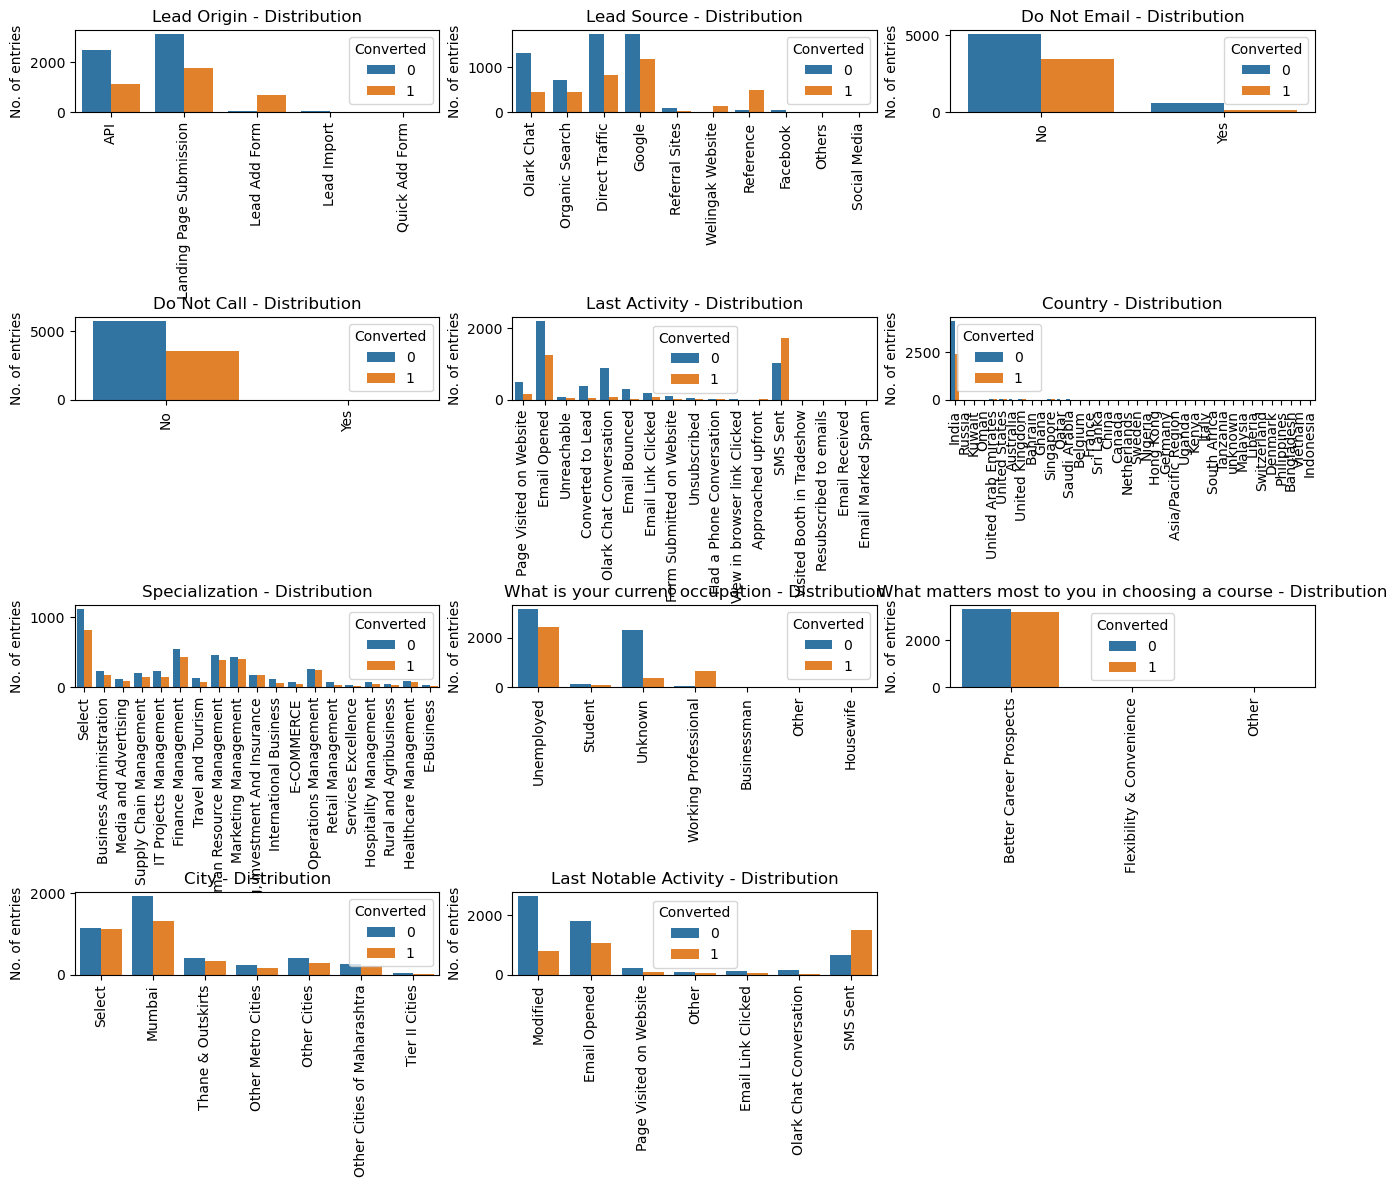

In [43]:
plot_histo(result_df,object_cols)

###### KEY OBSERVATIONS ON CATEGORICAL ANALYSIS:

* Do Not Call: From the above plot we are able to see imbalance therefore, we can drop the column 
* Last Activity: Email and SMS has high frequency based on their last Activity
* Country': Its mostly India, no inference can be drawn from this parameter.
* Specialization: We cannot conclude/impute this as it contains null values in large amount and other disciplines are distributed some what equal. 
* What is your current occupation:
* What matters most to you in choosing a course: Its mostly Career improvement, no inference can be drawn from this parameter. 
* City: Mumbai holds the first position and however we don't have full info as more than half of our values are null(i.e 'Select')
* Last Notable Activity: Maximum leads are generated having last activity as  Modified and Email opened .

In [44]:
# Moving before to the next step we can remove the unwanted/irrelevant columns for our analysis-
#'Do Not Call','Last Activity','Country','Specialization','What matters most to you in choosing a course',
#'City','Last Notable Activity' 
result_df=result_df.drop(["Do Not Call"],axis=1)
result_df=result_df.drop(["Last Activity"],axis=1)
result_df=result_df.drop(["Last Notable Activity"],axis=1)
result_df=result_df.drop(["Country"],axis=1)
result_df=result_df.drop(["Specialization"],axis=1)
result_df=result_df.drop(["What matters most to you in choosing a course"],axis=1)
result_df=result_df.drop(["City"],axis=1)

In [45]:
result_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


### iv) NUMERICAL COLUMN ANALYSIS

In [46]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Converted                        9240 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9240 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9240 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 577.6+ KB


In [47]:
#list of Numerical columns in result_df
num_cols=list(result_df.columns[result_df.dtypes!="object"])
num_cols

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [48]:
#Before going to Numerical column analysis we'll cross check missing values
for i in num_cols:
    print(i +" - Missing values: ", result_df[i].isnull().sum())


Converted - Missing values:  0
TotalVisits - Missing values:  137
Total Time Spent on Website - Missing values:  0
Page Views Per Visit - Missing values:  137


In [49]:
#We are removing the rows with null values as they are negligible

result_df=result_df.dropna(subset=['Page Views Per Visit','TotalVisits'],axis=0)

In [50]:
result_df.shape

(9103, 8)

In [51]:
#checking null percentage for result_df
(result_df.isnull().sum()/len(result_df)*100).sort_values(ascending=False)

Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
What is your current occupation    0.0
dtype: float64

Now we can start performing Analysis on Numerical columns

###### * CONVERTED

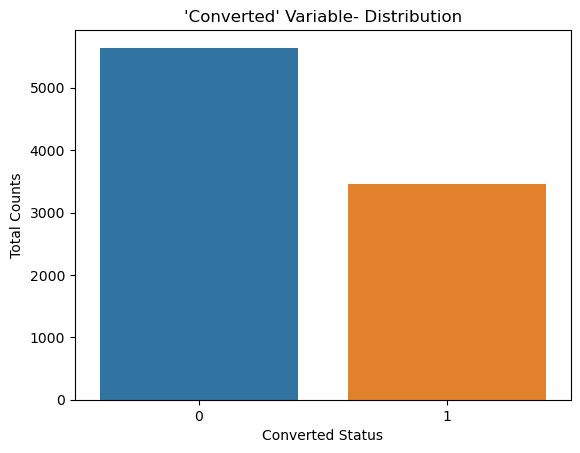

In [52]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing'Converted' Variable- Distribution
sns.countplot(result_df["Converted"])
plt.xlabel("Converted Status")
plt.ylabel("Total Counts")
plt.title("'Converted' Variable- Distribution")
plt.show()

In [53]:
# Finding out conversion rate
Conversion_rate = (sum(result_df['Converted'])/len(result_df['Converted'].index))*100
Conversion_rate

38.02043282434362

* The current Conversion rate of leads is around 38% approx.

###### * TOTAL VISITS

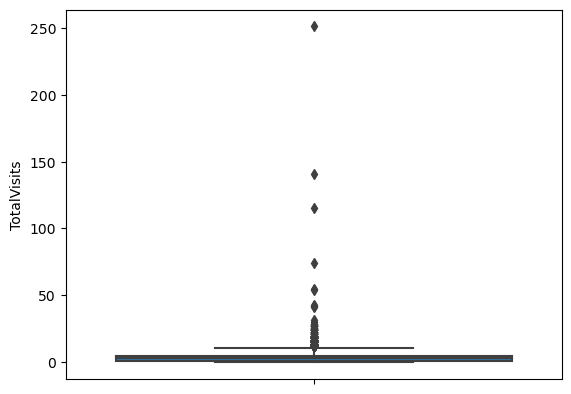

In [54]:
#Visualizing'TotalVisits' Variable- Distribution

sns.boxplot(y=result_df['TotalVisits'])
plt.show()

* From the above boxplot we clearly see that there are outlier values exists in TotalVisits variable

In [55]:
#checking percentile values for "Total Visits"

result_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

Outlier Treatment
* Since we observer most values falls under 95 and 99th percentiles we will be capping the outliers to 95% value for analysis

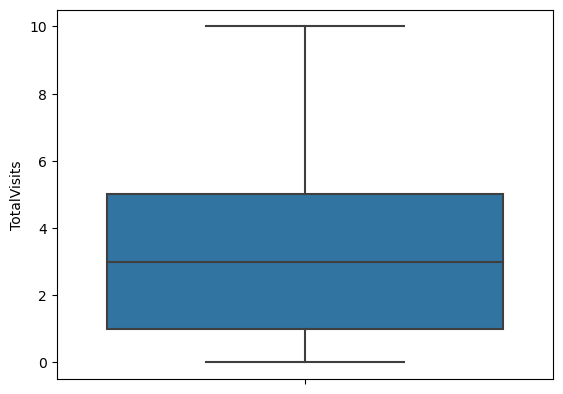

In [56]:
percentiles = result_df['TotalVisits'].quantile([0.05,0.95]).values
result_df['TotalVisits'][result_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
result_df['TotalVisits'][result_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=result_df['TotalVisits'])
plt.show()

###### *  TOTAL TIME SPENT ON WEBSITE

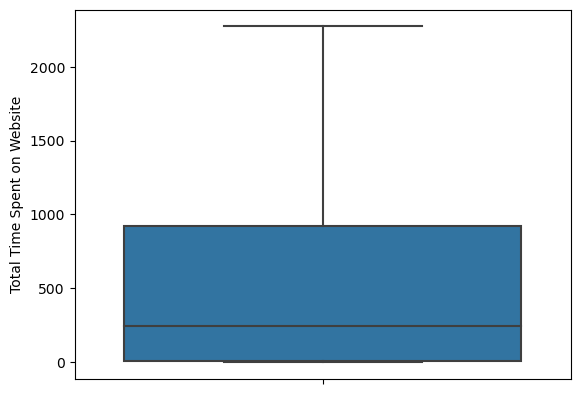

In [57]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = result_df['Total Time Spent on Website'])
plt.show()

* No major outliers observed for the above variable, therefore outlier treatment is not required.

###### * PAGE VIEWS PER VISIT

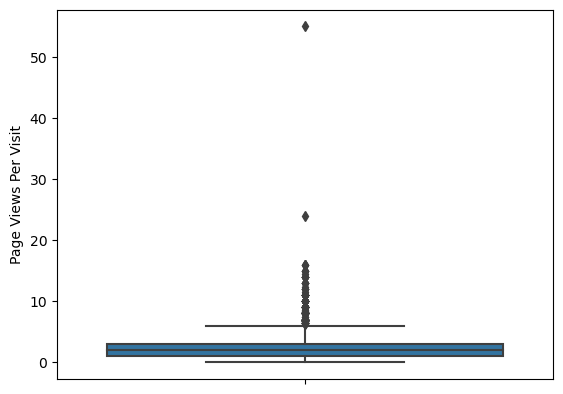

In [58]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =result_df['Page Views Per Visit'])
plt.show()

* For Page Views Per Visit Variable we need to treat the outlier values.

In [59]:
#checking percentile values for "Page Views Per Visit"

result_df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

Outlier Treatment

* Since we observer most values falls under 95 and 99th percentiles we will be capping the outliers to 95% value for analysis

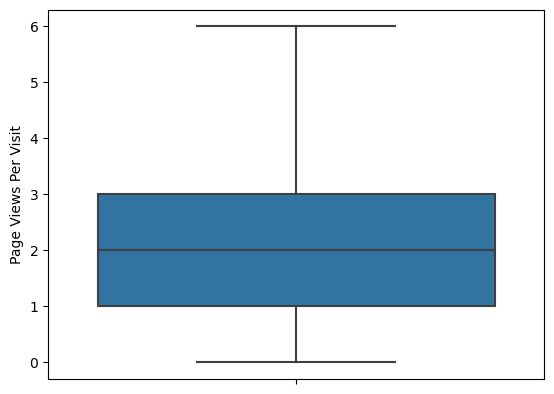

In [60]:
percentiles = result_df['Page Views Per Visit'].quantile([0.05,0.95]).values
result_df['Page Views Per Visit'][result_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
result_df['Page Views Per Visit'][result_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=result_df['Page Views Per Visit'])
plt.show()

### v) BIVARIATE ANALYSIS

* We are going to plot Bivariate boxplots for below combinations
* Converted vs TotalVisits
* Converted vs Total Time Spent on Website
* Converted vs Page Views Per Visit


In [61]:
#Creating a user def function for bivariate boxplots

def bivariate_boxplots(df,col_1,col_2):
    plt.figure(figsize = (8,4))
    plt.title(col_1 +" vs "+col_2)
    sns.boxplot(col_1, col_2, data =df)
    plt.xticks(rotation=90)
    plt.show()

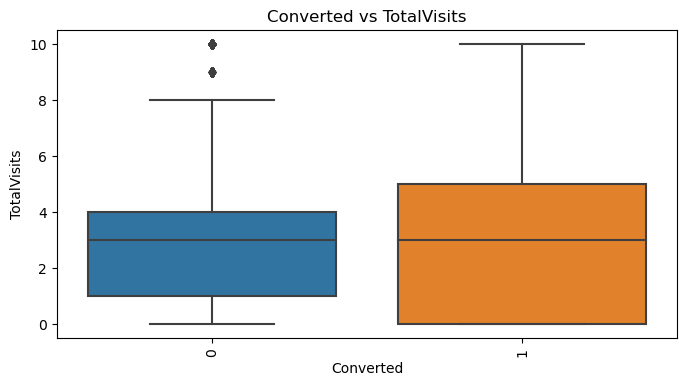

In [62]:
bivariate_boxplots(result_df,'Converted','TotalVisits')

* We can observe that Median for converted and not converted leads is almost same.
* So we cannot predict/conclude anything from above

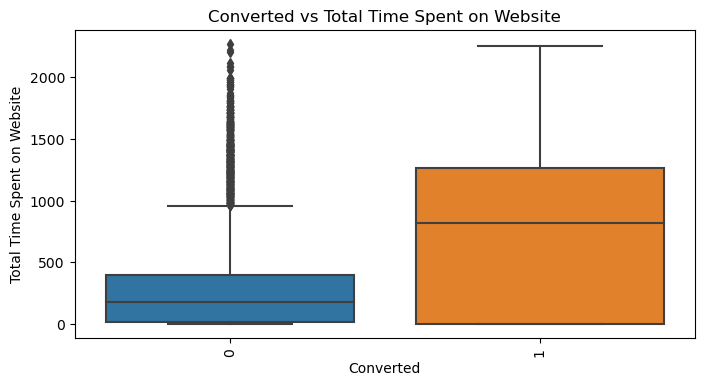

In [63]:
bivariate_boxplots(result_df,'Converted','Total Time Spent on Website')

* We can observe that leads who spends most time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate.

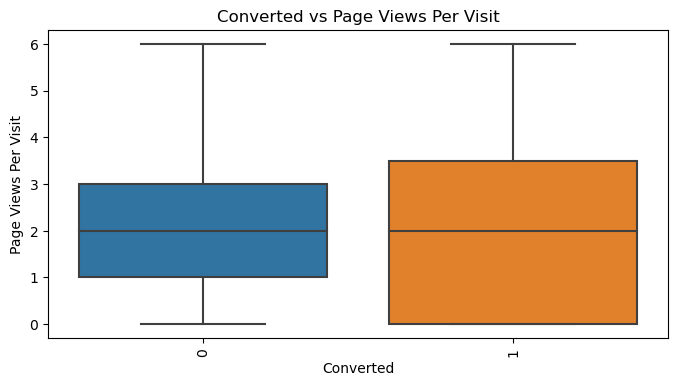

In [64]:
bivariate_boxplots(result_df,'Converted','Page Views Per Visit')

* We can observe that Median for converted and not converted leads is almost same.
* So we cannot predict/conclude anything from above

### vi) HEAT MAP ANALYSIS on NUMERICAL COLS

In [65]:
num_cols

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

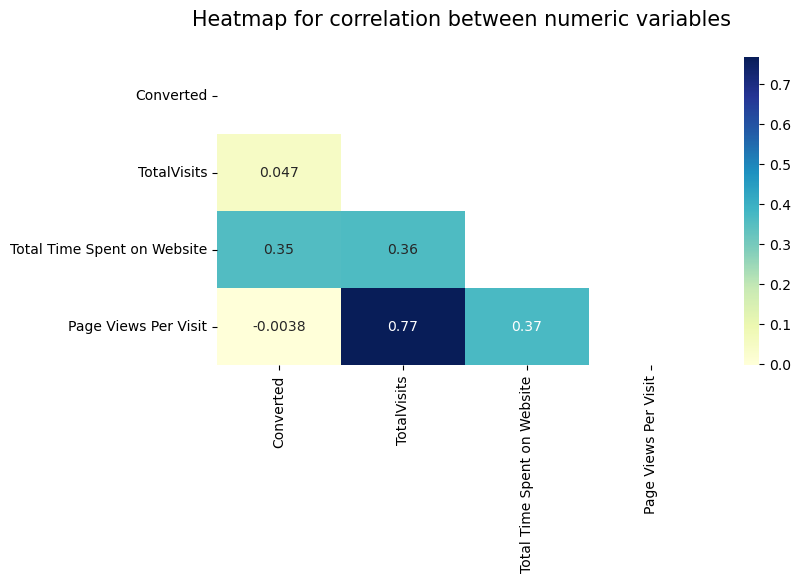

In [66]:
#Checking correlations of numeric values using heatmap
plt.figure(figsize=(8,4))
matrix=np.triu(result_df[num_cols].corr())
sns.heatmap(result_df[num_cols].corr(),cmap="YlGnBu",annot=True,mask=matrix)
plt.title('Heatmap for correlation between numeric variables \n',fontdict={'fontsize':15})
plt.show()

* From the above we observe that Page views per visit and Total visits are highly correlated

#### SUMMARY ON OUR EDA:
        * Data cleaning and data handling has beend done on our raw data.
        * We have performed categorical analysis and dropped columns which are not required or irrelevant for our analysis
        * Also we have performed analysis on numerical variables,bivariate analysis on Num. variables 
        * Now, all data labels are in good shape , we will proceed to our next step- Data Preparation

## III) DATA PREPARATION

### i) Converting some binary variables (Yes/No) to 0/1
* In Do Not Email column we have Yes or no values we can convert them the 0/1

In [67]:
# List of variables to map

lst=  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
result_df[lst] = result_df[lst].apply(binary_map)

In [68]:
result_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [69]:
#Do Not Email type has been changed from object to int
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 640.1+ KB


### ii) Dummy Variable Creation

In [70]:
#list of Categorical object columns in result_df
object_cols=list(result_df.columns[result_df.dtypes=="object"])
object_cols

['Lead Origin', 'Lead Source', 'What is your current occupation']

In [71]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(result_df[['Lead Origin']], drop_first=True)
result_df = pd.concat([result_df,dummy],1)



dummy = pd.get_dummies(result_df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
result_df = pd.concat([result_df, dummy], axis = 1)


dummy = pd.get_dummies(result_df['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Unknown'], 1)
result_df = pd.concat([result_df, dummy], axis = 1)

In [72]:
result_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [73]:
#dropping the original columns after dummy variable creation

result_df.drop(object_cols,1,inplace = True)

In [74]:
result_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


# 

## IV) TEST-TRAIN SPLIT

In [75]:
# Putting feature variable to X
X=result_df.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [76]:
# Putting response variable to y
y = result_df['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [77]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# 

## V) FEATURE SCALING

In [78]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,-0.294015,-0.068258,1.476324,-0.423364,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5520,-0.294015,1.362470,-0.771066,2.083179,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1962,-0.294015,0.647106,-0.571257,0.133646,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1566,-0.294015,2.435517,1.393834,0.690655,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9170,-0.294015,-1.141305,-0.881052,-1.258878,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [79]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.02043282434362

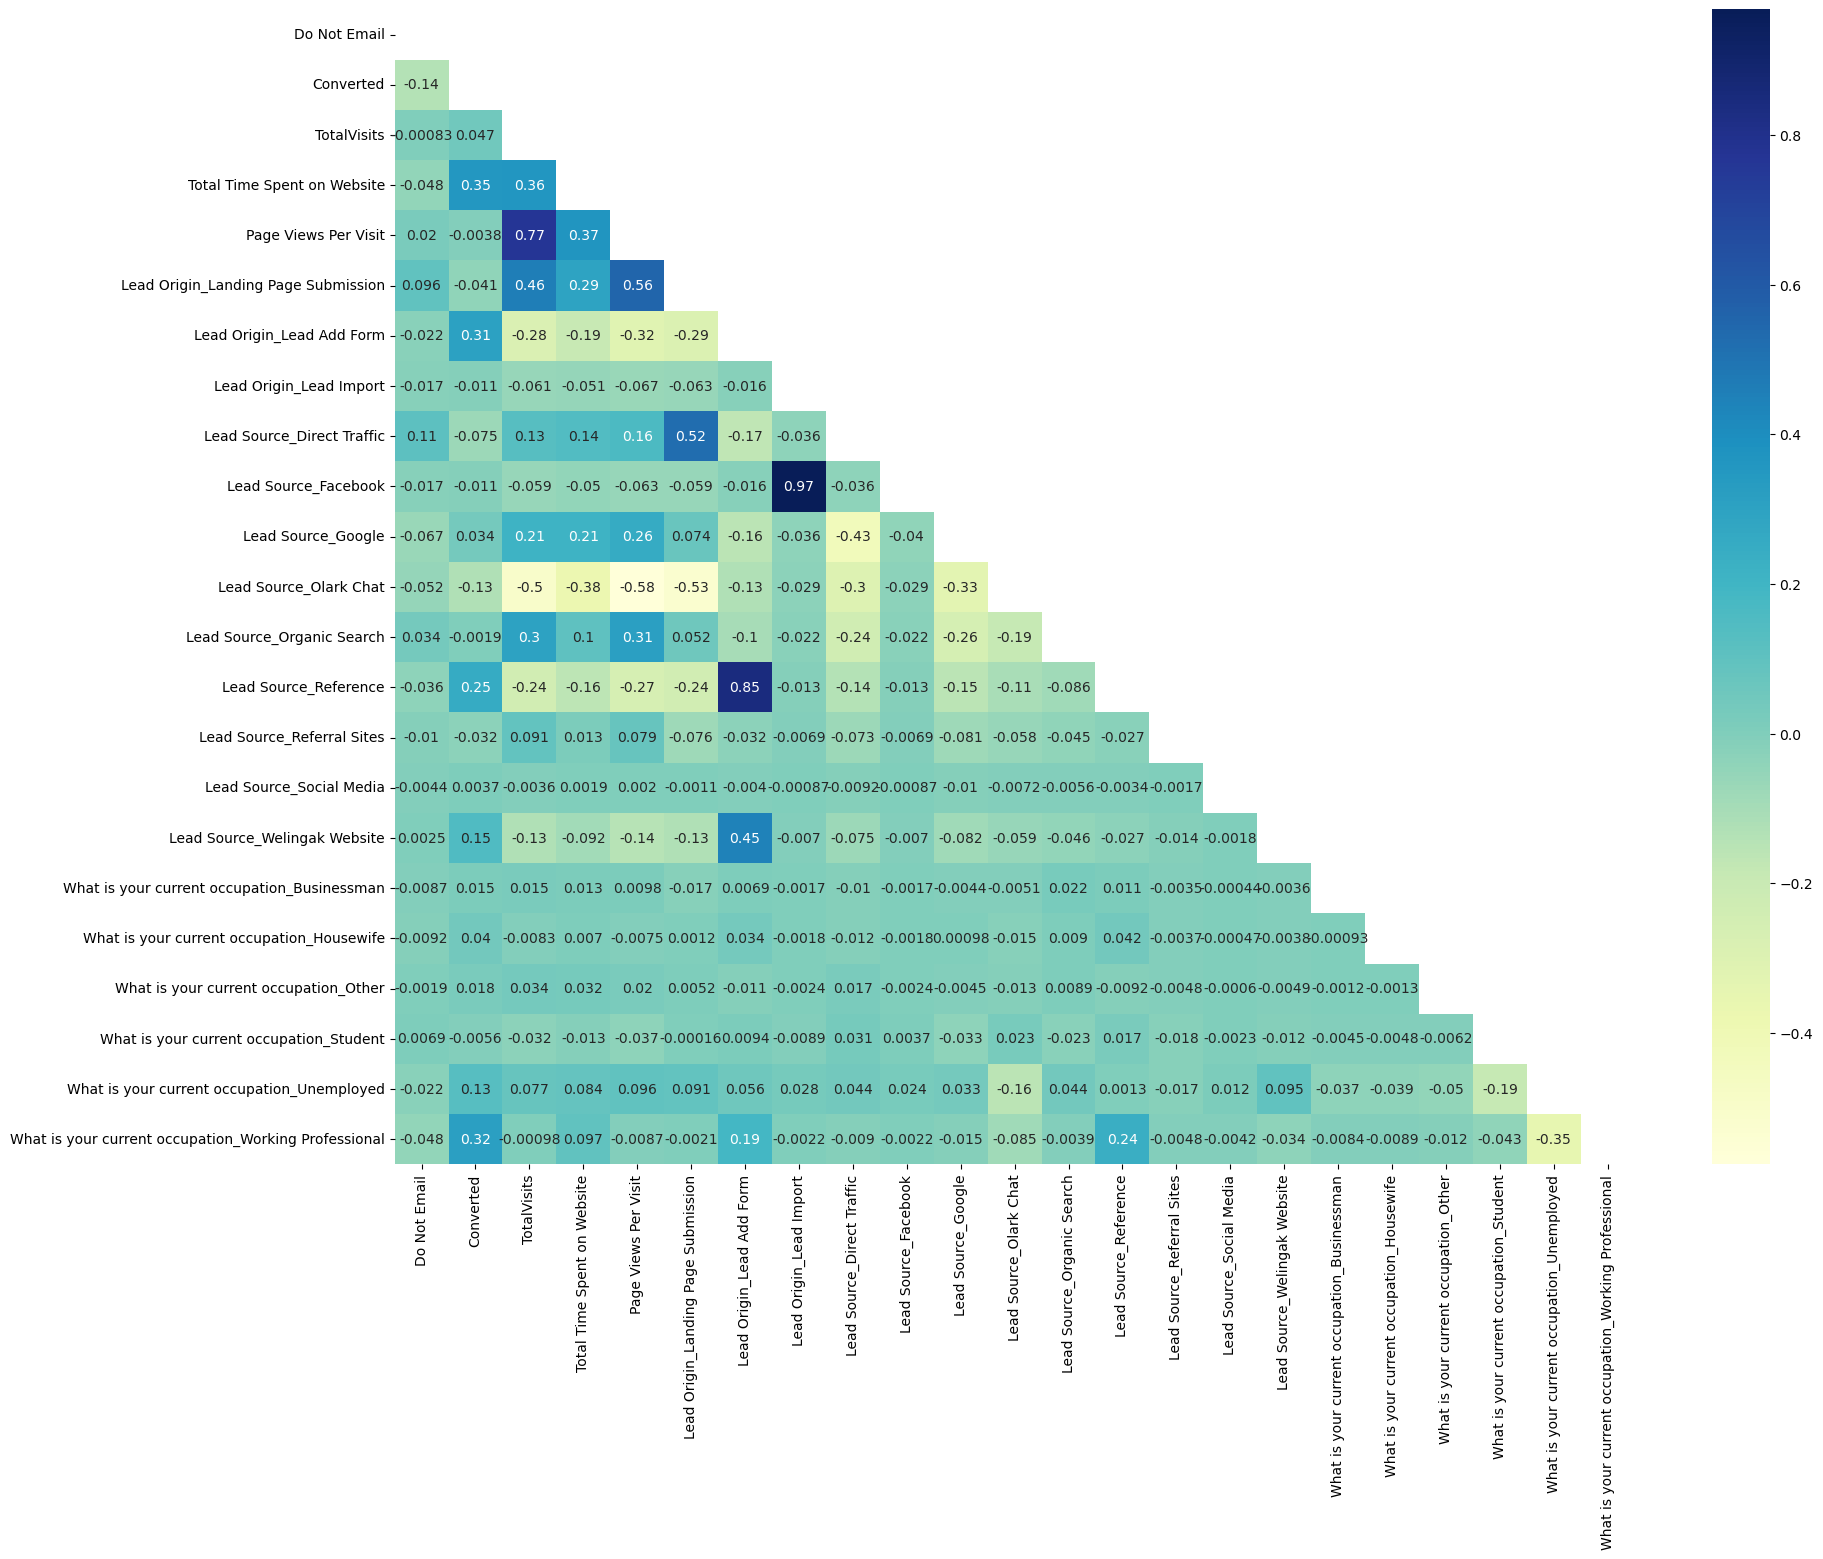

In [80]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
matrix=np.triu(result_df.corr())
sns.heatmap(result_df.corr(),cmap="YlGnBu",annot = True,mask=matrix)
plt.show()

##### * Dropping highly correlated dummy variables in test and train splits based on the above heat map

In [81]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

In [82]:
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

# 

## VI) MODEL BUILDING

* Here we are going to build our models using Stats and Recursive Feature Elimination (RFE) approach
* Before proceeding we have imported the required packages. 

In [83]:
# Build a Logistic Regression  model using SKLearn for RFE
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [84]:
#Reducing no of features to 15 using automated approach

rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [85]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [86]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [87]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Social Media'],
      dtype='object')

In [88]:
#Creating user defined functions to Build Model
def Build_Model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    return res.summary()

#Function to calculate VIFs and print them -
#Takes the columns for which VIF to be calcualted as a parameter
def Get_VIF(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by='VIF',ascending=False)

### i) MODEL 1

* Selected columns for Model 1 - all columns selected by RFE

In [89]:
col1=col
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [90]:
#BUILDING MODEL #1
Build_Model(col1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.8
Date:                Sun, 09 Apr 2023   Deviance:                       5725.6
Time:                        10:11:45   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3490
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2420      0.096    -12.979      0.000      -1.430      -1.054
Do Not Email                                            -0.3583      0.043     -8.295      0.000      -0.443      -0.274
Total Time Spent on Website                              1.0998      0.038     28.576      0.000       1.024       1.175
Lead Origin_Lead Add Form                                4.1642      0.774      5.379      0.000       2.647       5.682
Lead Source_Direct Traffic                              -1.0592      0.108     -9.834      0.000      -1.270      -0.848
Lead Source_Google                                      -0.7850      0.103     -7.616      0.000      -0.987      -0.583
Lead Source_Organic Search                              -0.8803      0.124     -7.094      0.000      -1.123      -0.637
Lead Source_Reference                                   -1.3303      0.806     -1.650      0.099      -2.911       0.250
Lead Source_Referral Sites                              -1.3703      0.336     -4.075      0.000      -2.029      -0.711
Lead Source_Welingak Website                             0.7219      1.055      0.684      0.494      -1.347       2.790
What is your current occupation_Businessman              1.5018      0.999      1.503      0.133      -0.456       3.460
What is your current occupation_Housewife               23.8830    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_Other                    1.3577      0.641      2.118      0.034       0.101       2.614
What is your current occupation_Student                  1.1827      0.225      5.268      0.000       0.743       1.623
What is your current occupation_Unemployed               1.3095      0.083     15.683      0.000       1.146       1.473
What is your current occupation_Working Professional     3.8054      0.189     20.105      0.000       3.434       4.176
========================================================================================================================
"""

* "What is your current occupation_Housewife" is insignificant as it has very high p-value.

### ii) MODEL 2

* Selected columns for Model 2 - Since the p-value of variable "What is your current occupation_Housewife" is very high, so we can drop it and build a model with the remaining vars.

In [91]:
#dropping column with high p-value

col2 = col1.drop('What is your current occupation_Housewife',1)
col2

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [92]:
#BUILDING MODEL #2

Build_Model(col2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.3
Date:                Sun, 09 Apr 2023   Deviance:                       5744.6
Time:                        10:11:45   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3470
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2247      0.095    -12.862      0.000      -1.411      -1.038
Do Not Email                                            -0.3597      0.043     -8.331      0.000      -0.444      -0.275
Total Time Spent on Website                              1.0996      0.038     28.619      0.000       1.024       1.175
Lead Origin_Lead Add Form                                4.1662      0.774      5.381      0.000       2.649       5.684
Lead Source_Direct Traffic                              -1.0517      0.108     -9.778      0.000      -1.262      -0.841
Lead Source_Google                                      -0.7756      0.103     -7.540      0.000      -0.977      -0.574
Lead Source_Organic Search                              -0.8645      0.124     -6.984      0.000      -1.107      -0.622
Lead Source_Reference                                   -1.3089      0.806     -1.623      0.105      -2.889       0.272
Lead Source_Referral Sites                              -1.3681      0.336     -4.072      0.000      -2.027      -0.710
Lead Source_Welingak Website                             0.7294      1.055      0.691      0.490      -1.339       2.798
What is your current occupation_Businessman              1.4744      1.000      1.475      0.140      -0.485       3.434
What is your current occupation_Other                    1.3321      0.641      2.079      0.038       0.076       2.588
What is your current occupation_Student                  1.1579      0.224      5.160      0.000       0.718       1.598
What is your current occupation_Unemployed               1.2836      0.083     15.498      0.000       1.121       1.446
What is your current occupation_Working Professional     3.7795      0.189     19.999      0.000       3.409       4.150
========================================================================================================================
"""

 * p-value of variable "Lead Source_Welingak Website" is high

### iii) MODEL 3

* Selected columns for Model 3 - "Lead Source_Welingak Website" we'll drop it and build a model with the remaining vars.

In [93]:
#dropping column with high p-value

col3 = col2.drop('Lead Source_Welingak Website',1)
col3

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'What is your current occupation_Businessman',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [94]:
#BUILDING MODEL #3
Build_Model(col3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.5
Date:                Sun, 09 Apr 2023   Deviance:                       5745.1
Time:                        10:11:45   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3470
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2215      0.095    -12.847      0.000      -1.408      -1.035
Do Not Email                                            -0.3606      0.043     -8.350      0.000      -0.445      -0.276
Total Time Spent on Website                              1.1006      0.038     28.654      0.000       1.025       1.176
Lead Origin_Lead Add Form                                4.6079      0.523      8.807      0.000       3.582       5.633
Lead Source_Direct Traffic                              -1.0559      0.107     -9.832      0.000      -1.266      -0.845
Lead Source_Google                                      -0.7818      0.103     -7.623      0.000      -0.983      -0.581
Lead Source_Organic Search                              -0.8687      0.124     -7.026      0.000      -1.111      -0.626
Lead Source_Reference                                   -1.7536      0.564     -3.109      0.002      -2.859      -0.648
Lead Source_Referral Sites                              -1.3724      0.336     -4.085      0.000      -2.031      -0.714
What is your current occupation_Businessman              1.4745      1.000      1.475      0.140      -0.485       3.434
What is your current occupation_Other                    1.3324      0.641      2.080      0.038       0.077       2.588
What is your current occupation_Student                  1.1571      0.225      5.154      0.000       0.717       1.597
What is your current occupation_Unemployed               1.2843      0.083     15.505      0.000       1.122       1.447
What is your current occupation_Working Professional     3.7806      0.189     20.002      0.000       3.410       4.151
========================================================================================================================
"""

### 

### iv) MODEL 4

* Selected columns for Model 4 - "What is your current occupation_Businessman" we'll drop it and build a model with the remaining vars.

In [95]:
col4=col3.drop('What is your current occupation_Businessman',1)
col4

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [96]:
#BUILDING MODEL #4
Build_Model(col4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.5
Date:                Sun, 09 Apr 2023   Deviance:                       5747.1
Time:                        10:11:45   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3468
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2155      0.095    -12.809      0.000      -1.401      -1.030
Do Not Email                                            -0.3610      0.043     -8.360      0.000      -0.446      -0.276
Total Time Spent on Website                              1.1004      0.038     28.661      0.000       1.025       1.176
Lead Origin_Lead Add Form                                4.6094      0.523      8.810      0.000       3.584       5.635
Lead Source_Direct Traffic                              -1.0547      0.107     -9.823      0.000      -1.265      -0.844
Lead Source_Google                                      -0.7815      0.103     -7.622      0.000      -0.983      -0.581
Lead Source_Organic Search                              -0.8655      0.124     -7.003      0.000      -1.108      -0.623
Lead Source_Reference                                   -1.7436      0.564     -3.091      0.002      -2.849      -0.638
Lead Source_Referral Sites                              -1.3729      0.336     -4.087      0.000      -2.031      -0.715
What is your current occupation_Other                    1.3254      0.641      2.069      0.039       0.070       2.581
What is your current occupation_Student                  1.1497      0.224      5.122      0.000       0.710       1.590
What is your current occupation_Unemployed               1.2770      0.083     15.469      0.000       1.115       1.439
What is your current occupation_Working Professional     3.7733      0.189     19.975      0.000       3.403       4.143
========================================================================================================================
"""

### 

### v) MODEL 5
* Selected columns for Model 5 - 'What is your current occupation_Other' we'll drop it and build a model with the remaining vars.

In [97]:
col5=col4.drop('What is your current occupation_Other',1)
col5

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [98]:
#BUILDING MODEL #5

Build_Model(col5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2875.6
Date:                Sun, 09 Apr 2023   Deviance:                       5751.2
Time:                        10:11:45   Pearson chi2:                 6.43e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3464
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2020      0.094    -12.723      0.000      -1.387      -1.017
Do Not Email                                            -0.3600      0.043     -8.348      0.000      -0.445      -0.276
Total Time Spent on Website                              1.1023      0.038     28.710      0.000       1.027       1.178
Lead Origin_Lead Add Form                                4.6119      0.523      8.816      0.000       3.587       5.637
Lead Source_Direct Traffic                              -1.0496      0.107     -9.783      0.000      -1.260      -0.839
Lead Source_Google                                      -0.7804      0.102     -7.615      0.000      -0.981      -0.580
Lead Source_Organic Search                              -0.8639      0.124     -6.987      0.000      -1.106      -0.622
Lead Source_Reference                                   -1.7425      0.564     -3.089      0.002      -2.848      -0.637
Lead Source_Referral Sites                              -1.3749      0.336     -4.094      0.000      -2.033      -0.717
What is your current occupation_Student                  1.1342      0.224      5.057      0.000       0.695       1.574
What is your current occupation_Unemployed               1.2613      0.082     15.384      0.000       1.101       1.422
What is your current occupation_Working Professional     3.7575      0.189     19.919      0.000       3.388       4.127
========================================================================================================================
"""

* p-value for all the features is almost 0.0 
* Since the Model 5 seems to be stable with significant p-values, we shall go ahead with this model for further analysis

### Calculating VIF for Model 5:

In [99]:
Get_VIF(col5)

,Features,VIF
2,Lead Origin_Lead Add Form,3.81
6,Lead Source_Reference,3.63
9,What is your current occupation_Unemployed,2.58
4,Lead Source_Google,1.70
3,Lead Source_Direct Traffic,1.67
5,Lead Source_Organic Search,1.31
10,What is your current occupation_Working Profes...,1.29
1,Total Time Spent on Website,1.12
8,What is your current occupation_Student,1.05
0,Do Not Email,1.03


* VIF values are within the acceptable range.
* Out all the models model 5 seems to give good result therefore we can proceed with making predictions using this model only

## VII) MODEL EVALUATIONS - TRAIN SET

### i) Predicting a Train model

In [100]:
# Getting the Predicted values on the train set
X_train_sm = sm.add_constant(X_train[col5])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.733427
5520    0.150019
1962    0.223565
1566    0.968245
9170    0.308725
5097    0.112311
8954    0.254701
309     0.258253
5519    0.112311
1050    0.648854
dtype: float64

In [101]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73342692, 0.15001897, 0.22356515, 0.96824499, 0.30872547,
       0.11231116, 0.25470142, 0.25825332, 0.11231116, 0.64885439])

In [102]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.733427,7962
1,0,0.150019,5520
2,0,0.223565,1962
3,1,0.968245,1566
4,0,0.308725,9170


In [103]:

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.733427,7962,1
1,0,0.150019,5520,0
2,0,0.223565,1962,0
3,1,0.968245,1566,1
4,0,0.308725,9170,0


### Metrics 
* Accuracy 
* Sensitivity
* Specificity 
* False Positive Rate
* Postitive Predictive Value 
* Negative Predictive Value

In [104]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3550  403]
 [ 849 1570]]


In [105]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8035153797865662


In [106]:
TP = confusion[1,1] # True Positive 
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.649028524183547

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.8980521123197571

In [109]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10194788768024285


In [110]:
# positive predictive value 
print (TP / float(TP+FP))

0.7957425240750127


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8070015912707433


### 

### ii) PLOTTING ROC CURVE

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR) or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

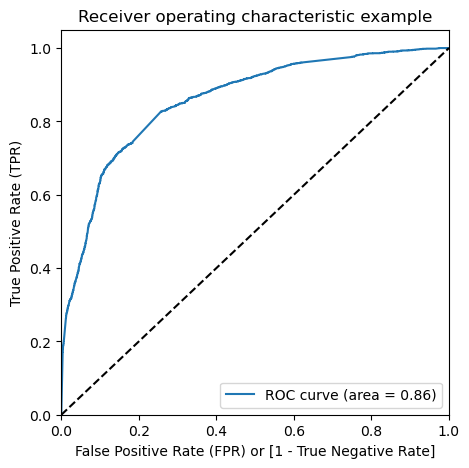

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

* The ROC Curve should be a value close to 1. We are getting a good value of 0.86 indicating a good predictive model.

### iii) Finding Optimal Cutoff Point

* Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.733427,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.150019,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.223565,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.968245,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.308725,9170,0,1,1,1,1,0,0,0,0,0,0


In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.515694  0.981811  0.230458
0.2   0.2  0.690521  0.906573  0.558310
0.3   0.3  0.770559  0.828855  0.734885
0.4   0.4  0.801946  0.700703  0.863901
0.5   0.5  0.803515  0.649029  0.898052
0.6   0.6  0.780917  0.560976  0.915507
0.7   0.7  0.759102  0.466308  0.938275
0.8   0.8  0.733992  0.353865  0.966608
0.9   0.9  0.690207  0.192642  0.994688


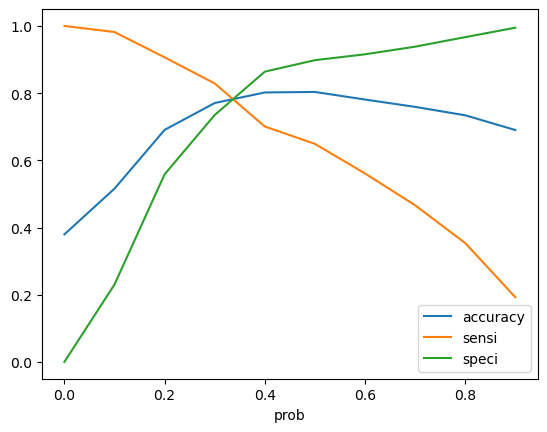

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

* From the curve above, 0.3 (approx) is the optimum point to take it as a cutoff probability.

In [118]:

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.733427,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.150019,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.223565,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.968245,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.308725,9170,0,1,1,1,1,0,0,0,0,0,0,1


In [119]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.733427,7962,1,73
1,0,0.150019,5520,0,15
2,0,0.223565,1962,0,22
3,1,0.968245,1566,1,97
4,0,0.308725,9170,1,31


In [120]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    2005
0     414
Name: final_Predicted, dtype: int64

In [121]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

###### * We can observe that the final prediction of conversions have a target of 83% conversion as per the X Educations CEO's requirement . 
###### * Therefore, we can take it as a good model.

#### Overall Metrics - Accuracy, Confusion Matrix, Sensitivity, Specificity,False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall. (on Train set)

In [122]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7705586942875079

In [123]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2905, 1048],
       [ 414, 2005]], dtype=int64)

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8288548987184787

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.7348848975461675

##### Observations
* So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

* Accuracy : 77.05%
* Sensitivity :82.89%
* Specificity : 73.49%

In [127]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2651151024538325


In [128]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6567310841794956


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8752636336245857


#### Precision and Recall

In [130]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2905, 1048],
       [ 414, 2005]], dtype=int64)

In [131]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6567310841794956

In [132]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8288548987184787

In [133]:
#precision_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6567310841794956

In [134]:
#recall_score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8288548987184787

#### Precision and Recall Trade-off

In [135]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

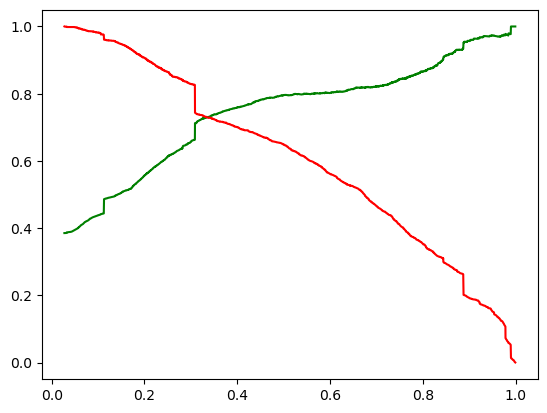

In [136]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## VII) MODEL EVALUATIONS - TEST SET

### i) Predicting a Test model

In [137]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.058621,-0.108519,0.416452,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4050,-0.293797,-1.150166,-0.888077,-1.263530,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7201,3.403712,-0.422469,0.420993,-0.143542,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,-0.293797,0.305228,-0.110357,0.976446,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8219,-0.293797,1.396773,-0.433947,-0.283540,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [138]:
#Test model with our column list of Model5
X_test = X_test[col5]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.108519,0,0,0,1,0,0,0,1,0
4050,-0.293797,-0.888077,1,0,0,0,1,0,0,1,0
7201,3.403712,0.420993,0,1,0,0,0,0,0,1,0
1196,-0.293797,-0.110357,0,0,0,1,0,0,0,1,0
8219,-0.293797,-0.433947,0,1,0,0,0,0,0,1,0


In [139]:
X_test_sm = sm.add_constant(X_test)

In [140]:
X_test_sm.shape

(2731, 12)

In [141]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.306096
4050    0.886499
7201    0.147829
1196    0.305665
8219    0.203766
8747    0.111534
9048    0.319527
6524    0.223440
7693    0.052311
8187    0.886499
dtype: float64

In [142]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [143]:
#head
y_pred_1.head()

,0
3504,0.306096
4050,0.886499
7201,0.147829
1196,0.305665
8219,0.203766


In [144]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [145]:
# Adding the CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [146]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [147]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [148]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.306096
1,1,4050,0.886499
2,0,7201,0.147829
3,0,1196,0.305665
4,1,8219,0.203766


In [149]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Probability_Converted'})

In [150]:
#HEAD
y_pred_final.head()

,Converted,Prospect ID,Probability_Converted
0,0,3504,0.306096
1,1,4050,0.886499
2,0,7201,0.147829
3,0,1196,0.305665
4,1,8219,0.203766


### ii) Assigning Lead Score

In [151]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Probability_Converted']]
y_pred_final['Lead_Score'] = y_pred_final.Probability_Converted.map( lambda x: round(x*100))

In [152]:
#  head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Probability_Converted,Lead_Score
0,3504,0,0.306096,31
1,4050,1,0.886499,89
2,7201,0,0.147829,15
3,1196,0,0.305665,31
4,8219,1,0.203766,20


In [153]:
y_pred_final['Predicted_FINAL'] = y_pred_final.Probability_Converted.map(lambda x: 1 if x > 0.3 else 0)

In [154]:
y_pred_final.head()

,Prospect ID,Converted,Probability_Converted,Lead_Score,Predicted_FINAL
0,3504,0,0.306096,31,1
1,4050,1,0.886499,89,1
2,7201,0,0.147829,15,0
3,1196,0,0.305665,31,1
4,8219,1,0.203766,20,0


In [155]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of Predicted_FINAL conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','Predicted_FINAL']]
checking_test_df['Predicted_FINAL'].value_counts()

1    865
0    177
Name: Predicted_FINAL, dtype: int64

In [156]:
# check the precentage of Predicted_FINAL conversions on test data

865/float(865+177)

0.8301343570057581

##### From the above we observe that the final prediction of conversions have a target rate of 83% (same as predictions made on training data set)

##### Overall Metrics - Accuracy, Confusion Matrix, Sensitivity, Specificity

In [158]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted_FINAL)

0.7751739289637496

In [159]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted_FINAL )
confusion2

array([[1252,  437],
       [ 177,  865]], dtype=int64)

In [160]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [161]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8301343570057581

In [162]:
# Let us calculate specificity
TN / float(TN+FP)

0.7412670219064535

### iii) Precision and Recall metrics for the test set

In [163]:
precision_score(y_pred_final.Converted , y_pred_final.Predicted_FINAL)

0.6643625192012289

In [164]:
recall_score(y_pred_final.Converted, y_pred_final.Predicted_FINAL)

0.8301343570057581

##### Observations:
* We have the following values for the Test Data:

* Accuracy : 77.52%
* Sensitivity :83.01%
* Specificity : 74.13%

================================THANK YOU==============================================

# SUMMARY:

* Upon checking both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.

* Accuracy, Sensitivity and Specificity values of test set are around 77%, 83% and 74% which are approximately near to the respective values calculated using trained set.

* Lead score is calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%

* Therefore we can consider this model as a good one.


### Top 3 Important features responsible/helps for good conversion rate are:

* Lead Origin_Lead Add Form
* What is your current occupation_Working Professional
* Total Time Spent on Website